In [3]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df= pd.read_csv(r'/Users/rahulpoojith/Documents/Excelr Datasets/Machine Learning Datasets/sales_data_with_discounts.csv')

In [5]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [6]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [8]:
df.size

5850

In [9]:
df.shape

(450, 13)

In [10]:
num_col= df.select_dtypes(include='number').columns.tolist()   ###select only Numerical columns
                                                               ###.columns- extract the columns names from the selected columns
                                                               ###.tolist()-convert the columns names into a python list 

In [11]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [12]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [13]:
#calculate the mean,median,mode & std dev
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [14]:
df['Volume'].median()

np.float64(4.0)

In [15]:
stats.mode(df["Total Sales Value"])

ModeResult(mode=np.int64(24300), count=np.int64(14))

In [16]:
df['Volume'].mode()

0    3
Name: Volume, dtype: int64

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

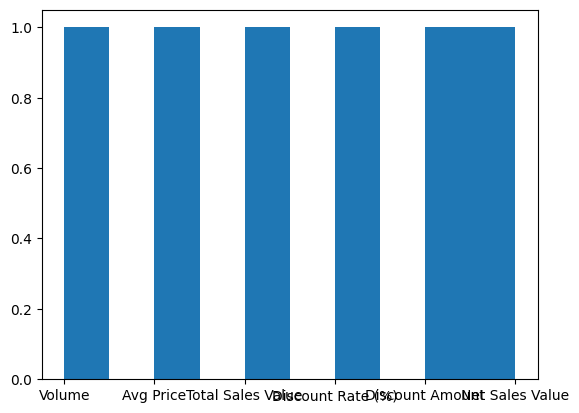

In [17]:
plt.hist(num_col) ## plot histogram for numerical column

## Data Visulization

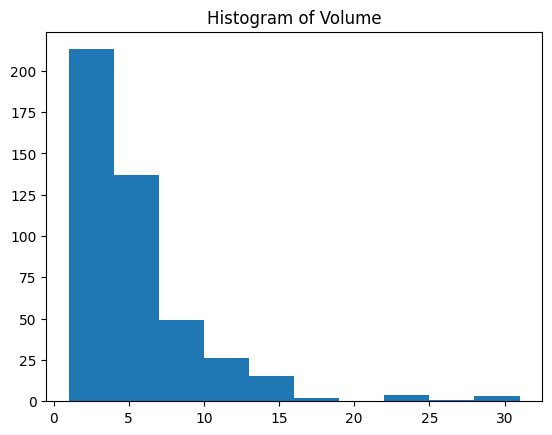

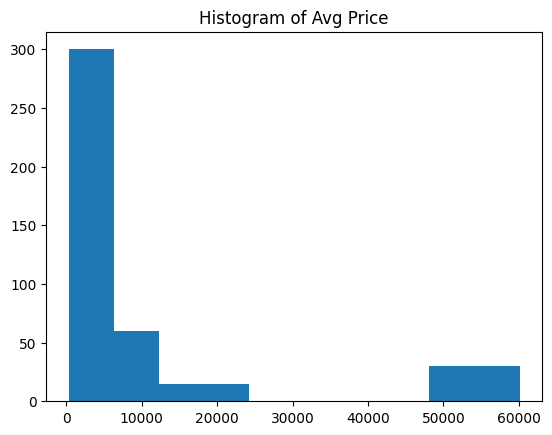

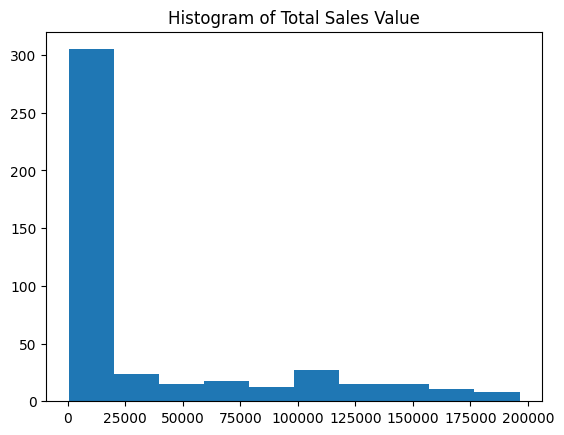

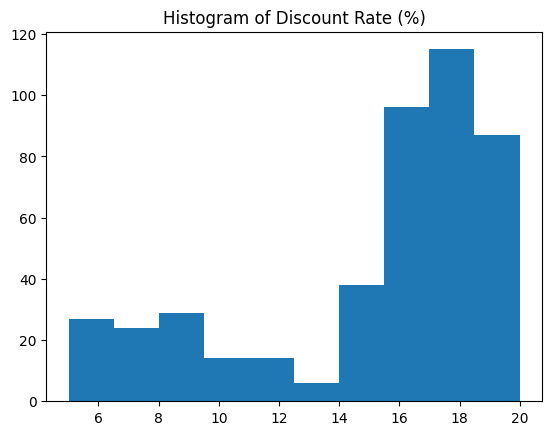

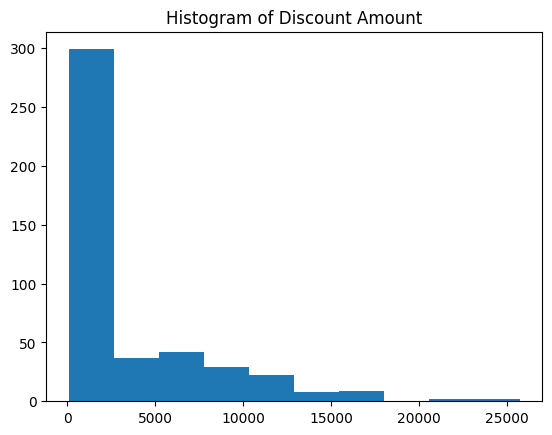

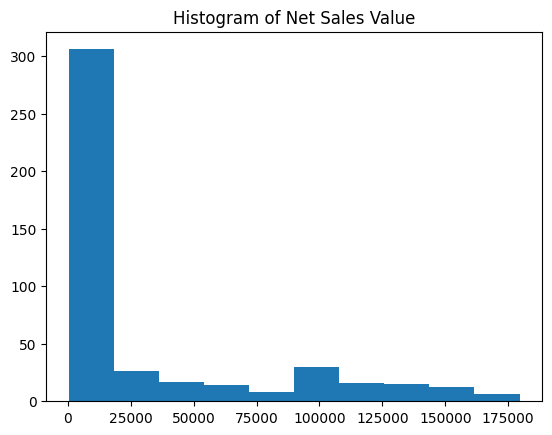

In [18]:
import matplotlib.pyplot as plt 
for col in num_col:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.show()

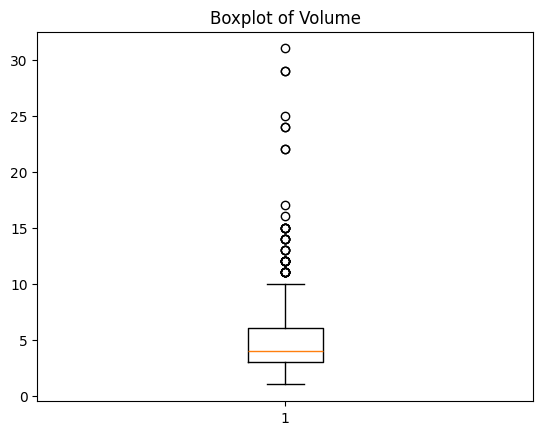

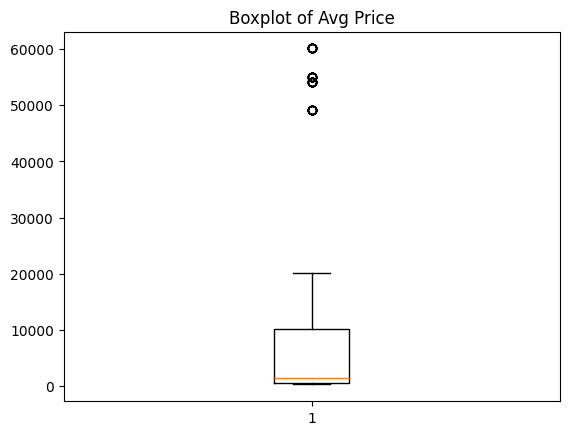

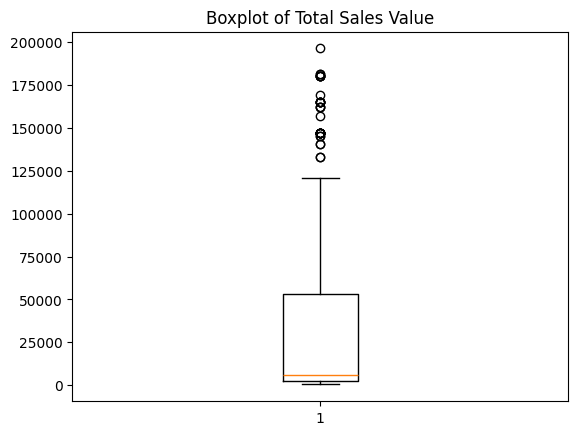

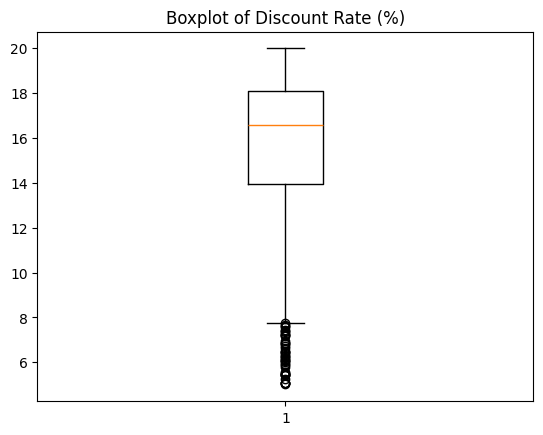

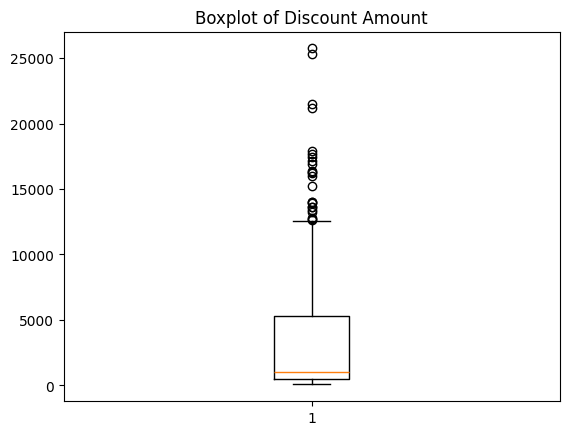

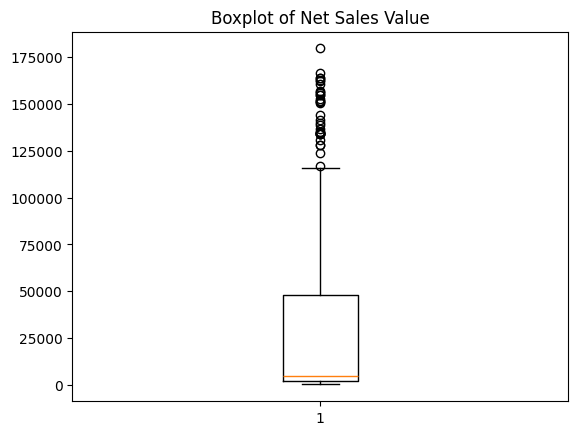

In [19]:
for col in num_col :
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()                       ### Plot the box plot of Numerical columns

In [20]:
## Bar chart analysis for categorical column.#Identify categroical column in the dataset
cat_col= df.select_dtypes(include='object').columns.tolist()
cat_col

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

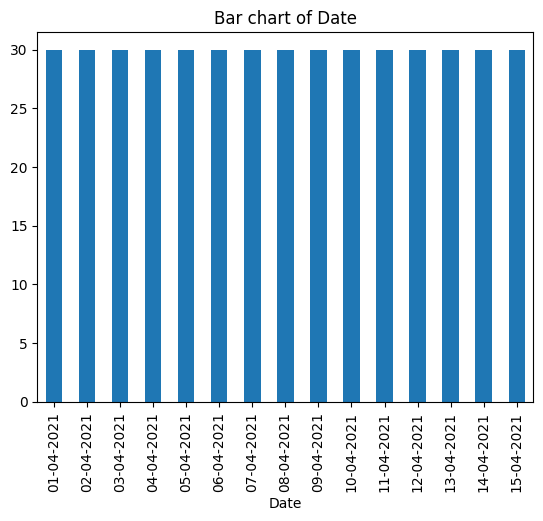

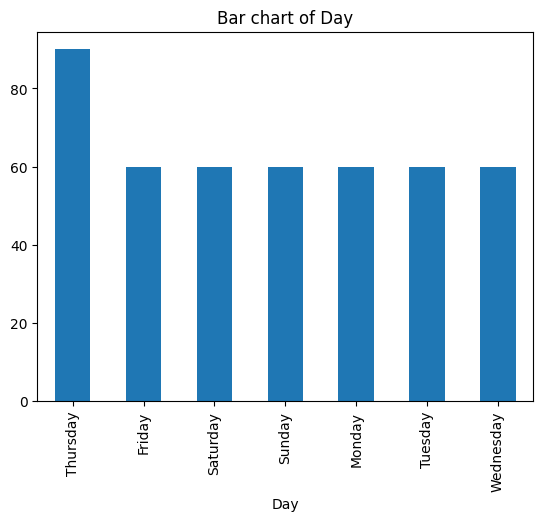

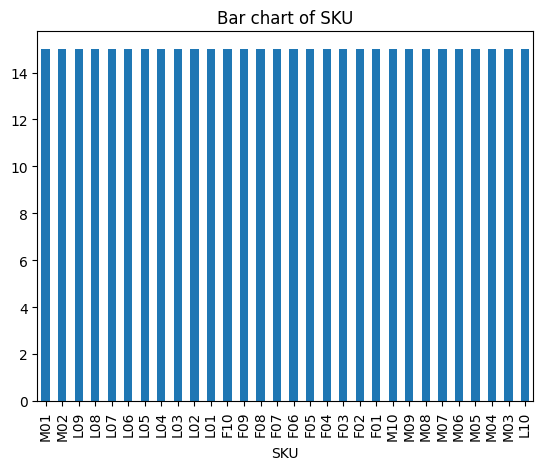

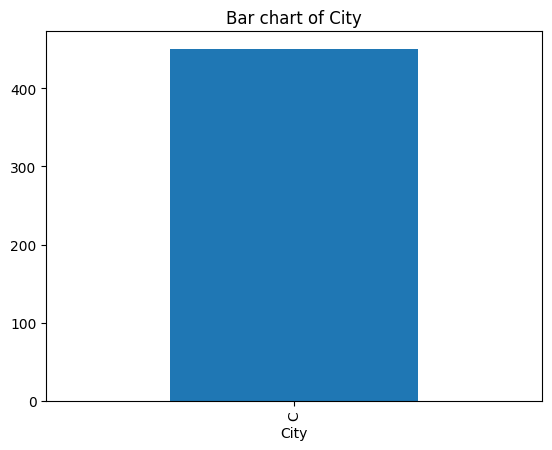

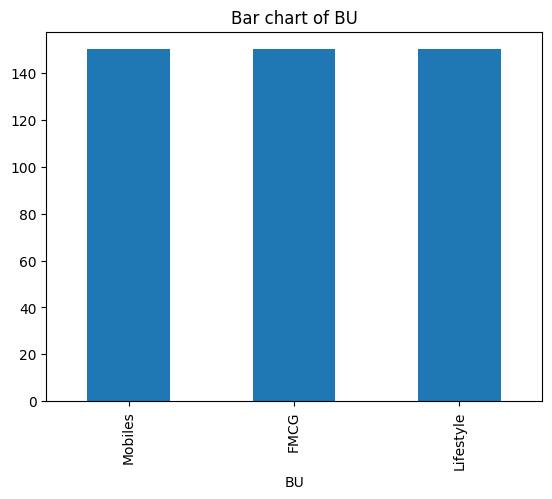

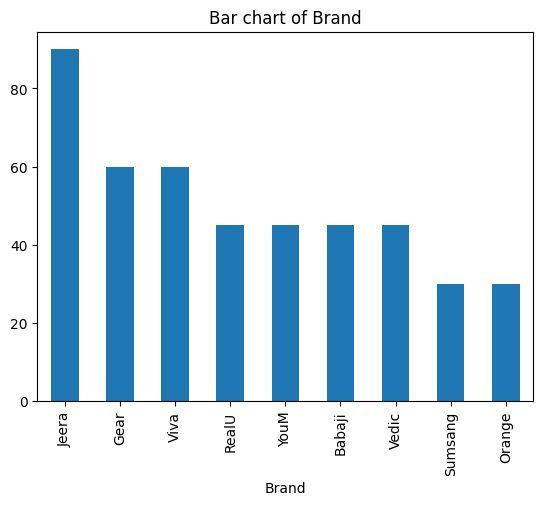

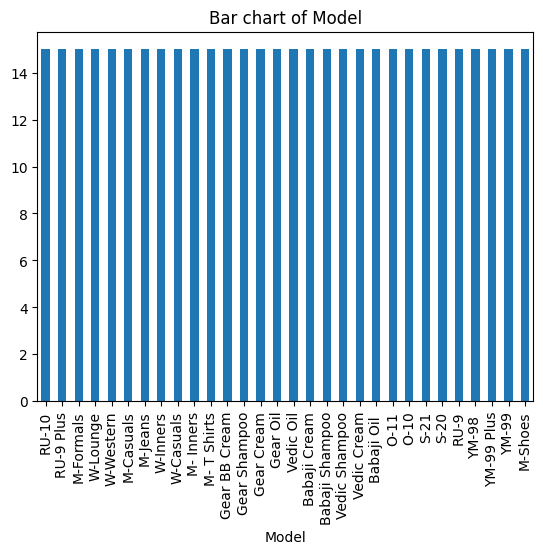

In [21]:
for col in cat_col:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {col}')
    plt.show()

In [22]:
num_col

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [23]:
##Standardize the numerical columns using the formula: z=x-mu/sigma
for col in num_col:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()
    print(f'column: {col}\nMean: {mean}\nMedian: {median}\nMode: {mode}\nStrandard Deviation: {std_dev}\n')

column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Strandard Deviation: 4.231602391213923

column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Strandard Deviation: 18079.90483993647

column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Strandard Deviation: 50535.07417255325

column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Strandard Deviation: 4.22060215332551

column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Strandard Deviation: 4509.9029633539985

column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Strandard Deviation: 46358.65662406695



Interpretation

Volume: The average volume of sales is around 5.07 units, with a median of 4 units, indicating that most of the sales volumes are around 4 to 5 units. The mode is 3, which means that 3 units is the most common sales volume. The standard deviation is 4.23, indicating a moderate spread around the mean.

Avg Price: The average price is approximately 10453.43 units, but the median is only 1450 units. This suggests that there are some very high prices pulling the mean up, but most prices are closer to 1450 units. The mode is 400, which is the most common price. The standard deviation is quite high (18079.90), indicating a wide spread in prices.

Total Sales Value: The average total sales value is around 33812.84 units, with a median of 5700 units. This suggests that there are some very high sales values pulling the mean up, but most sales values are closer to 5700 units. The mode is 24300, which is the most common sales value. The standard deviation is quite high (50535.07), indicating a wide spread in sales values.

Discount Rate (%): The average discount rate is 15.16%, with a median of 16.58%. This suggests that most of the discount rates are around 15% to 16%. The mode is 5.01%, which means that 5.01% is the most common discount rate. The standard deviation is 4.22%, indicating a moderate spread around the mean.

Discount Amount: The average discount amount is around 3346.50 units, with a median of 988.93 units. This suggests that there are some very high discount amounts pulling the mean up, but most discount amounts are closer to 988.93 units. The mode is 69.18, which is the most common discount amount. The standard deviation is quite high (4509.90), indicating a wide spread in discount amounts.

Net Sales Value: The average net sales value is around 30466.34 units, with a median of 4677.79 units. This suggests that there are some very high net sales values pulling the mean up, but most net sales values are closer to 4677.79 units. The mode is 326.97, which is the most common net sales value. The standard deviation is quite high (46358.66), indicating a wide spread in net sales values.

In [24]:
Q1 = df[num_col].quantile(0.25)   ##	Create the interquartile range.
Q3 = df[num_col].quantile(0.75)
IQR = Q3 -Q1
outliers = df[(df[num_col] < (Q1 - 1.5*IQR)) | (df[num_col] > (Q3 + 1.5*IQR))]
print('Outliers:')
print(outliers)

Outliers:
    Date  Day  SKU City  Volume   BU Brand Model  Avg Price  \
0    NaN  NaN  NaN  NaN    15.0  NaN   NaN   NaN        NaN   
1    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
2    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
3    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
4    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
..   ...  ...  ...  ...     ...  ...   ...   ...        ...   
445  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
446  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
447  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
448  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
449  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   

     Total Sales Value  Discount Rate (%)  Discount Amount  Net Sales Value  
0             181500.0                NaN      21153.49882     160346.50118  
1                  NaN                NaN              NaN              NaN  

Standardization or Z-score normalization is a technique that rescales data to have a mean of 0 and standard deviation of 1. It’s done using the formula

Z=σx−μ where

x is a value

μ is the mean

σ is the standard deviation

This process makes different datasets directly comparable and is often used in data analysis and machine learning.


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [27]:
df[num_col].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.157968e-17,-6.315935e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


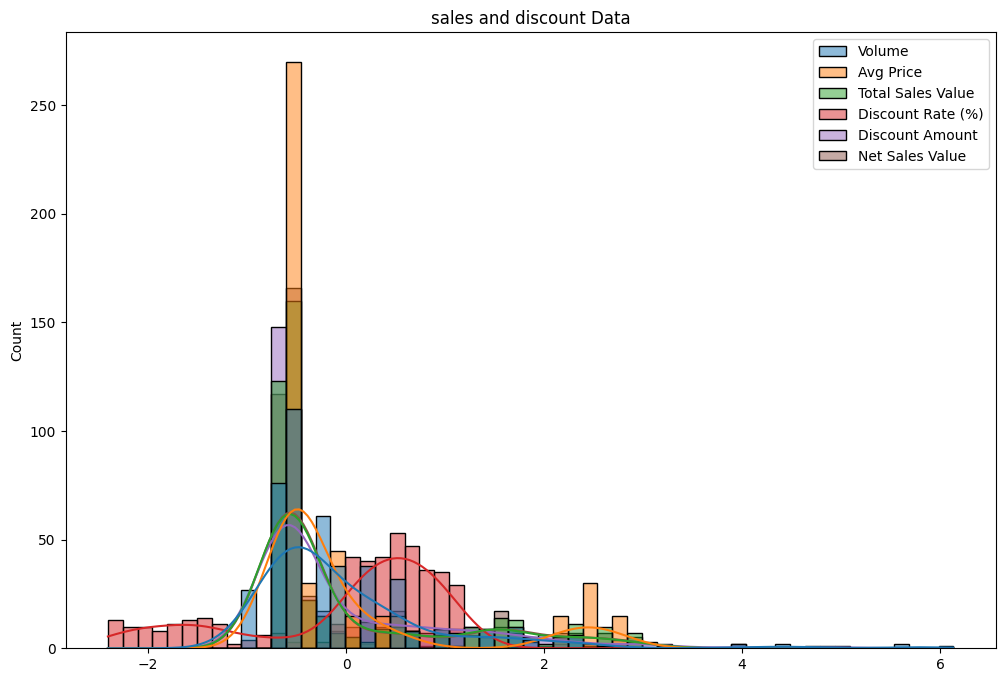

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[num_col],color = 'red',kde = True)
plt.title('sales and discount Data')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_to_scale = df['Volume'].values.reshape(-1,1)
df['column1_standardized']= scaler.fit_transform(data_to_scale)

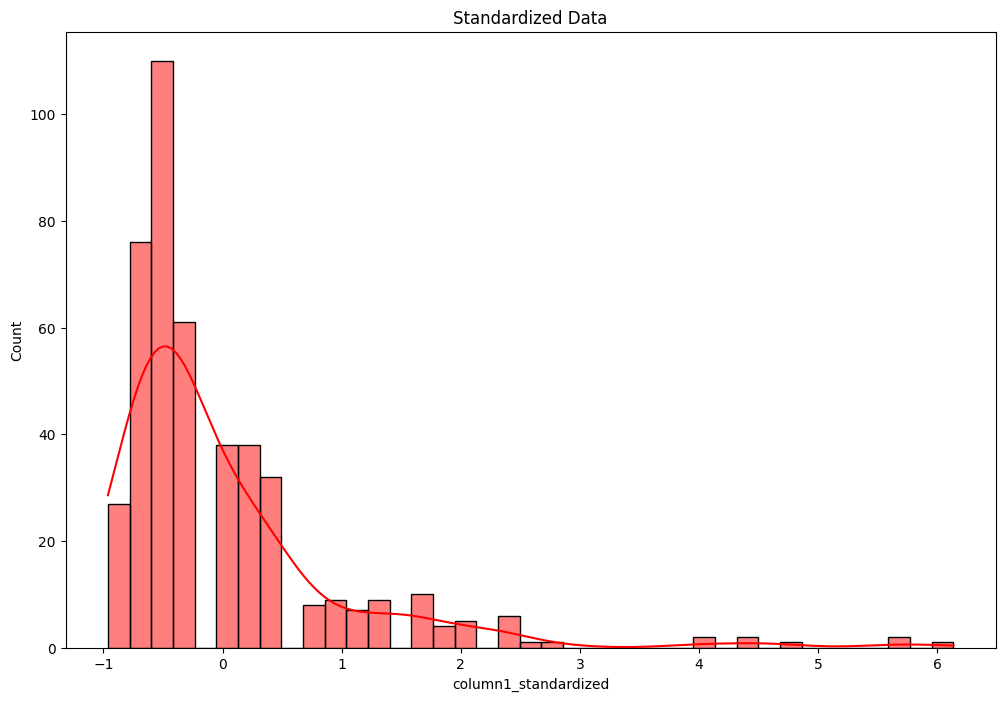

In [39]:
plt.figure(figsize = (12,8))
sns.histplot(df['column1_standardized'], color = 'Red', kde = True)
plt.title('Standardized Data')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data_to_scale = df['Avg Price'].values.reshape(-1,1)
df['column2_standardized']= scaler.fit_transform(data_to_scale)

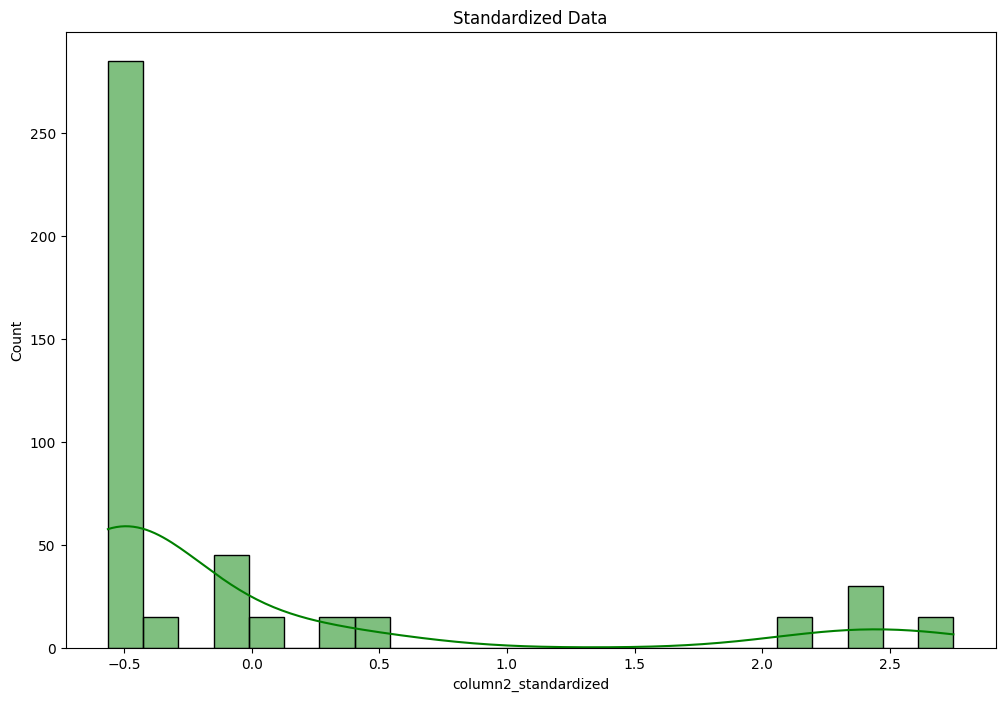

In [38]:
plt.figure(figsize = (12,8))
sns.histplot(df['column2_standardized'], color = 'Green', kde = True)
plt.title('Standardized Data')
plt.show()

# Conversion of Categorical Data into Dummy Variables
Categorical data is converted into dummy variables (one-hot encoding) because machine learning algorithms require numerical input. This conversion allows these algorithms to perform mathematical operations on the data. It also ensures that all categories are given equal importance, which can lead to better model performance. However, it can increase data dimensionality if the categorical feature has many unique categories

In [33]:
print(df.columns)

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value', 'column1_standardized',
       'column2_standardized'],
      dtype='object')


In [34]:
df['Day'].value_counts()

Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

In [35]:
from sklearn import preprocessing
trans = preprocessing.OneHotEncoder()
trans.fit(df)

OneHotEncoder()

In [36]:
df_encoded = pd.get_dummies(df, columns=['Day'])

In [37]:
print("\nTransformed DataFrame with One-Hot Encoding:")
print(df_encoded)


Transformed DataFrame with One-Hot Encoding:
           Date  SKU City    Volume         BU  Brand       Model  Avg Price  \
0    01-04-2021  M01    C  2.350029    Mobiles  RealU       RU-10   0.091173   
1    01-04-2021  M02    C  1.167129    Mobiles  RealU   RU-9 Plus  -0.019570   
2    01-04-2021  M03    C  0.457388    Mobiles   YouM       YM-99   0.312659   
3    01-04-2021  M04    C  0.220808    Mobiles   YouM  YM-99 Plus   0.534146   
4    01-04-2021  M05    C -0.488932    Mobiles   YouM      YM-98   -0.130313   
..          ...  ...  ...       ...        ...    ...         ...        ...   
445  15-04-2021  L06    C -0.725512  Lifestyle  Jeera   M-Casuals  -0.506840   
446  15-04-2021  L07    C  0.220808  Lifestyle   Viva   W-Western  -0.434857   
447  15-04-2021  L08    C -0.725512  Lifestyle   Viva    W-Lounge  -0.490229   
448  15-04-2021  L09    C -0.488932  Lifestyle  Jeera   M-Formals  -0.473617   
449  15-04-2021  L10    C -0.962092  Lifestyle  Jeera     M-Shoes  -0.4071

# conclusion

Data preprocessing, including steps like standardization and one-hot encoding, is essential in data analysis and machine learning for several key reasons:

Enhances Model Performance: Standardization helps normalize data scales, improving the effectiveness of algorithms sensitive to feature scale, while one-hot encoding ensures that categorical data is correctly interpreted by the models, avoiding biases related to ordinal assumptions.

Increases Algorithm Efficiency: Properly scaled and encoded data can speed up learning and convergence of algorithms, particularly those using optimization techniques like gradient descent.

Improves Accuracy: Clean and well-prepared data leads to more accurate models and reduced prediction errors by minimizing noise and ensuring consistent representation across datasets.

In short, effective data preprocessing is crucial for optimizing machine learning models' performance, accuracy, and efficiency
